In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/flight_data.csv')
df1.head()

,Unnamed: 0,to,from,date_to,date_from,pos_overall,url,type,price,airline,duration
0,0,"Chicago, IL (all airports)","New York, NY (all airports)","Sun, Dec 10","Wed, Dec 6",1,https://www.google.com/travel/flights?sca_esv=...,Connecting,$215,American,5h 13m+
1,0,"Chicago, IL (all airports)","New York, NY (all airports)","Sun, Dec 10","Wed, Dec 6",1,https://www.google.com/travel/flights?sca_esv=...,Nonstop,$378,Delta,2h 58m
2,0,"Chicago, IL (all airports)","New York, NY (all airports)","Sun, Dec 10","Wed, Dec 6",1,https://www.google.com/travel/flights?sca_esv=...,Nonstop,$414,Spirit,2h 31m
3,0,"Chicago, IL (all airports)","New York, NY (all airports)","Sun, Dec 10","Wed, Dec 6",1,https://www.google.com/travel/flights?sca_esv=...,Nonstop,$433,American,2h 50m
4,1,"Chicago, IL (all airports)","New York, NY (all airports)","Sat, Dec 9","Thu, Dec 7",1,https://www.google.com/travel/flights?sca_esv=...,Connecting,$206,American,3h 10m+


In [4]:
df=df1.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   128 non-null    int64 
 1   to           128 non-null    object
 2   from         128 non-null    object
 3   date_to      128 non-null    object
 4   date_from    128 non-null    object
 5   pos_overall  128 non-null    int64 
 6   url          128 non-null    object
 7   type         128 non-null    object
 8   price        128 non-null    object
 9   airline      128 non-null    object
 10  duration     128 non-null    object
dtypes: int64(2), object(9)
memory usage: 11.1+ KB


In [6]:
df.isnull().sum()

Unnamed: 0     0
to             0
from           0
date_to        0
date_from      0
pos_overall    0
url            0
type           0
price          0
airline        0
duration       0
dtype: int64

In [8]:
from datetime import datetime

from dateutil import parser
import pandas as pd

current_year = datetime.now().year

df['date_from'] = df['date_from'].apply(lambda x: parser.parse(x + f', {current_year}'))
df['date_to'] = df['date_to'].apply(lambda x: parser.parse(x + f', {current_year}'))

df['date_from'] = df['date_from'].apply(lambda x: x.replace(year=2023) if x.month == 12 and x.day <= 31 else x.replace(year=current_year+1))
df['date_to'] = df['date_to'].apply(lambda x: x.replace(year=2023) if x.month == 12 and x.day <= 31 else x.replace(year=current_year+1))

In [9]:



df['departure_day'] = df['date_to'].dt.strftime('%A')  # Format as the full name of the day

df['arrival_day'] = df['date_from'].dt.strftime('%A')  # Format as the full name of the day


In [10]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
df['duration'] = pd.to_timedelta(df['duration']).dt.total_seconds() / 60

#df['duration'] = pd.to_timedelta(df['duration']).dt.total_seconds().astype(int).apply(lambda x: '{:0>8}'.format(str(pd.to_datetime(x, unit='s').time())))

In [12]:
df = df.drop('Unnamed: 0', axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   to             128 non-null    object        
 1   from           128 non-null    object        
 2   date_to        128 non-null    datetime64[ns]
 3   date_from      128 non-null    datetime64[ns]
 4   pos_overall    128 non-null    int64         
 5   url            128 non-null    object        
 6   type           128 non-null    object        
 7   price          128 non-null    float64       
 8   airline        128 non-null    object        
 9   duration       128 non-null    float64       
 10  departure_day  128 non-null    object        
 11  arrival_day    128 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 12.1+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pos_overall,128.0,1.125000,0.698705,1.0,1.0,1.0,1.00,5.0
price,128.0,366.835938,170.307354,69.0,242.0,315.5,446.25,836.0
duration,128.0,411.929688,320.815574,151.0,194.0,249.5,670.00,1500.0


In [15]:
df.describe(include='object').T

,count,unique,top,freq
to,128,2,"Chicago, IL (all airports)",64
from,128,2,"New York, NY (all airports)",64
url,128,128,https://www.google.com/travel/flights?sca_esv=...,1
type,128,2,Nonstop,73
airline,128,7,Spirit,47
departure_day,128,6,Wednesday,36
arrival_day,128,7,Wednesday,32


In [16]:
df.head()

,to,from,date_to,date_from,pos_overall,url,type,price,airline,duration,departure_day,arrival_day
0,"Chicago, IL (all airports)","New York, NY (all airports)",2023-12-10,2023-12-06,1,https://www.google.com/travel/flights?sca_esv=...,Connecting,215.0,American,313.0,Sunday,Wednesday
1,"Chicago, IL (all airports)","New York, NY (all airports)",2023-12-10,2023-12-06,1,https://www.google.com/travel/flights?sca_esv=...,Nonstop,378.0,Delta,178.0,Sunday,Wednesday
2,"Chicago, IL (all airports)","New York, NY (all airports)",2023-12-10,2023-12-06,1,https://www.google.com/travel/flights?sca_esv=...,Nonstop,414.0,Spirit,151.0,Sunday,Wednesday
3,"Chicago, IL (all airports)","New York, NY (all airports)",2023-12-10,2023-12-06,1,https://www.google.com/travel/flights?sca_esv=...,Nonstop,433.0,American,170.0,Sunday,Wednesday
4,"Chicago, IL (all airports)","New York, NY (all airports)",2023-12-09,2023-12-07,1,https://www.google.com/travel/flights?sca_esv=...,Connecting,206.0,American,190.0,Saturday,Thursday


In [17]:
numerical_columns = ['pos_overall', 'price', 'duration']

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Display rows with outliers
outliers_df = df[outliers_iqr]
print(outliers_df)

                             to                         from    date_to  \
49   Houston, TX (all airports)  New York, NY (all airports) 2023-12-19   
66   Chicago, IL (all airports)        Los Angeles, CA (LAX) 2023-12-10   
67   Chicago, IL (all airports)        Los Angeles, CA (LAX) 2023-12-10   
76   Chicago, IL (all airports)        Los Angeles, CA (LAX) 2023-12-16   
77   Chicago, IL (all airports)        Los Angeles, CA (LAX) 2023-12-16   
78   Chicago, IL (all airports)        Los Angeles, CA (LAX) 2023-12-16   
79   Chicago, IL (all airports)        Los Angeles, CA (LAX) 2023-12-16   
98   Houston, TX (all airports)        Los Angeles, CA (LAX) 2023-12-10   
99   Houston, TX (all airports)        Los Angeles, CA (LAX) 2023-12-10   
102  Houston, TX (all airports)        Los Angeles, CA (LAX) 2023-12-09   
103  Houston, TX (all airports)        Los Angeles, CA (LAX) 2023-12-09   

     date_from  pos_overall  \
49  2023-12-10            1   
66  2023-12-06            1   
67  20

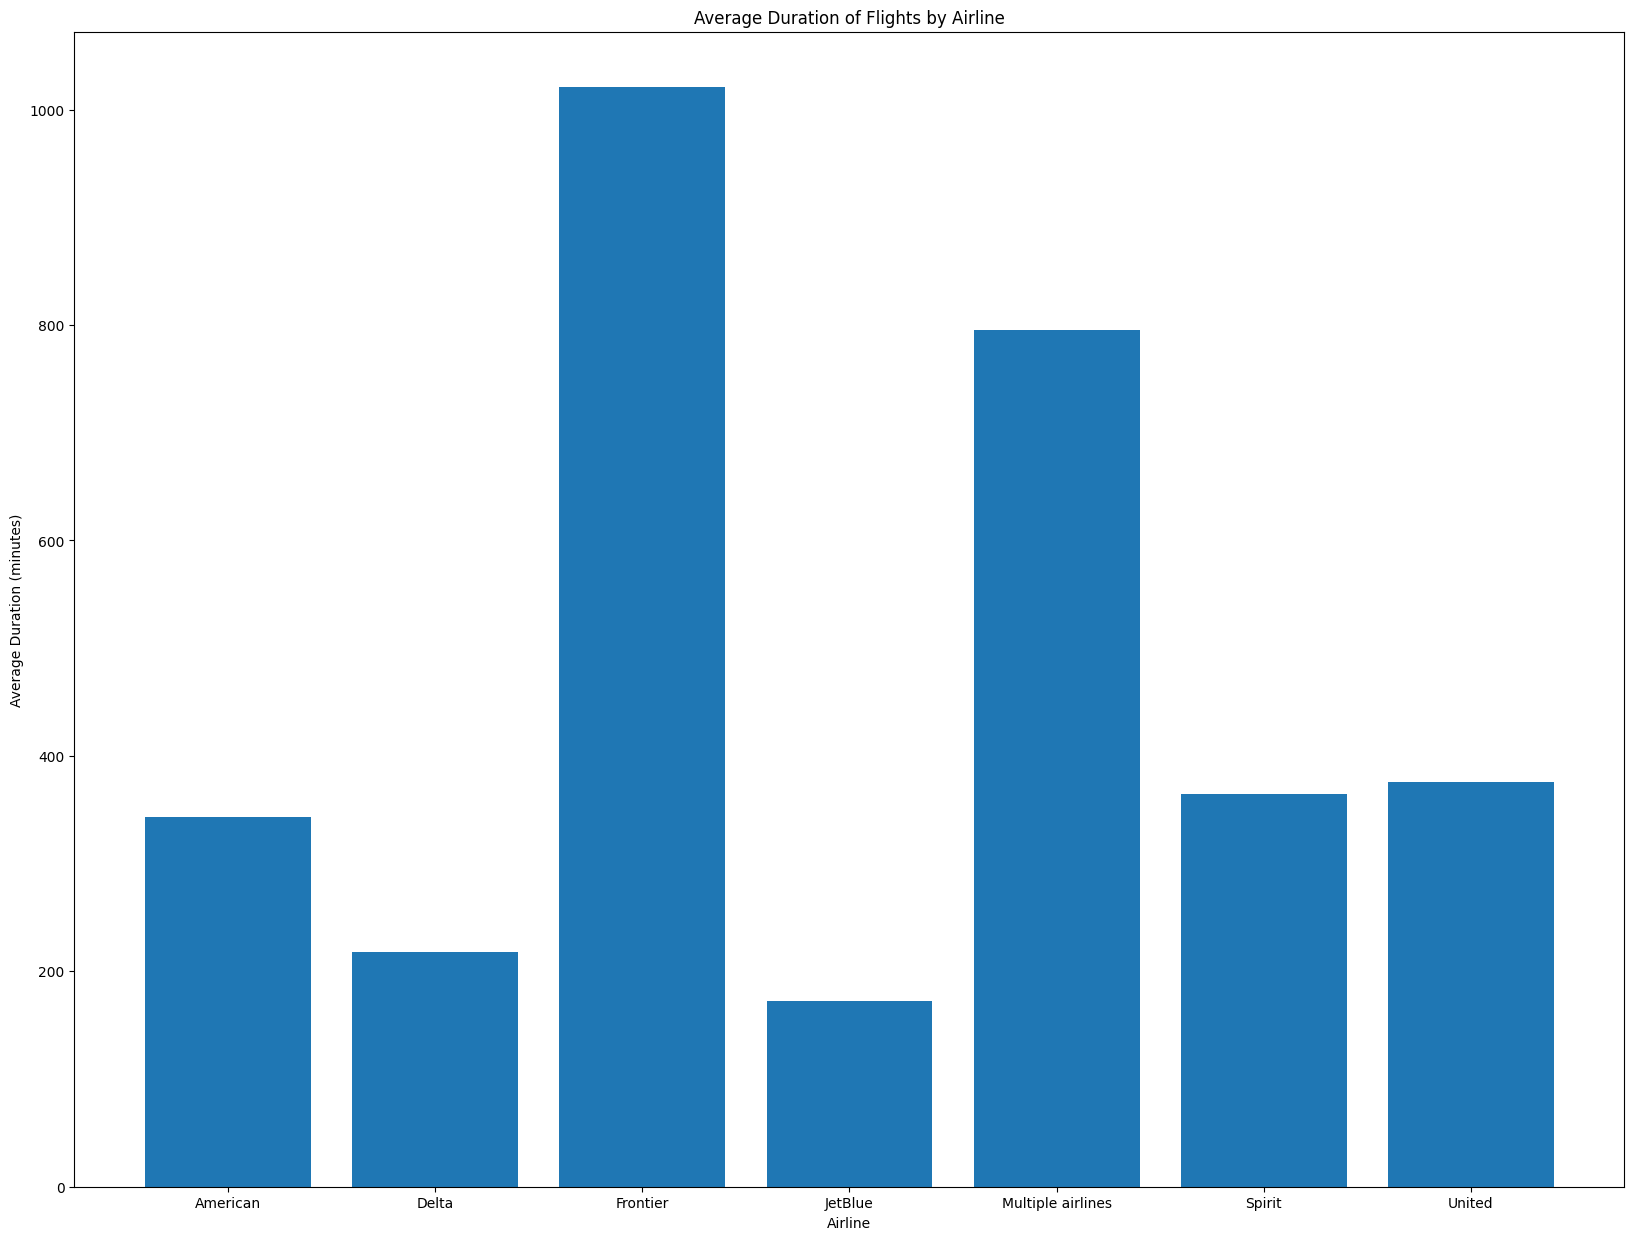

In [18]:
airline_average_duration = df.groupby('airline')['duration'].mean()

fig, ax = plt.subplots(figsize=(20, 15))

ax.bar(airline_average_duration.index, airline_average_duration.values)

ax.set_xlabel('Airline')
ax.set_ylabel('Average Duration (minutes)')
ax.set_title('Average Duration of Flights by Airline')

plt.show()

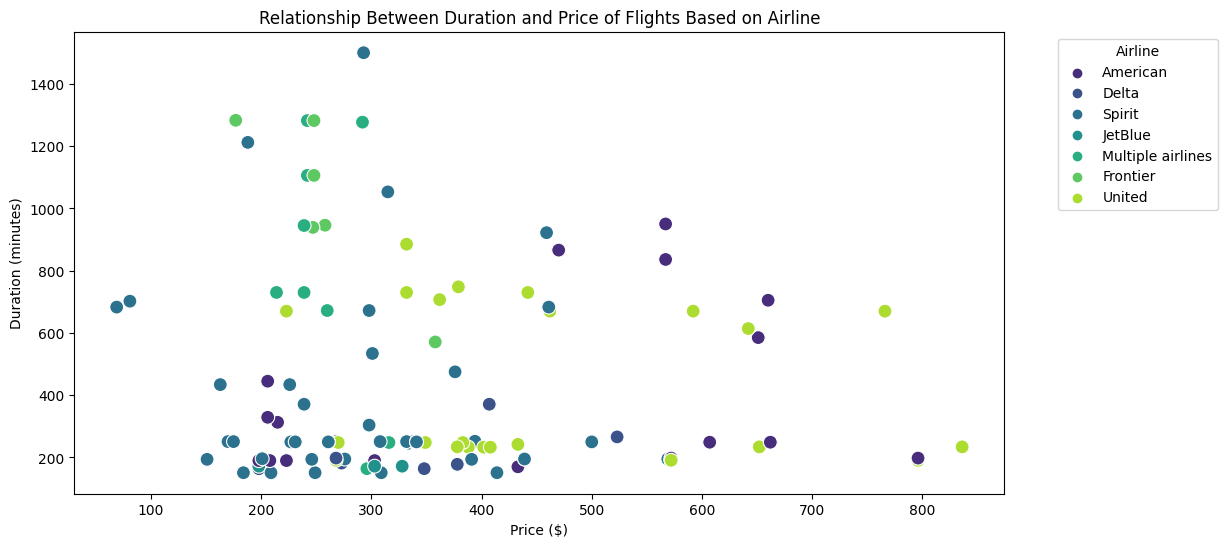

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='duration', hue='airline', data=df, palette='viridis', s=100)

plt.xlabel('Price ($)')
plt.ylabel('Duration (minutes)')
plt.title('Relationship Between Duration and Price of Flights Based on Airline')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

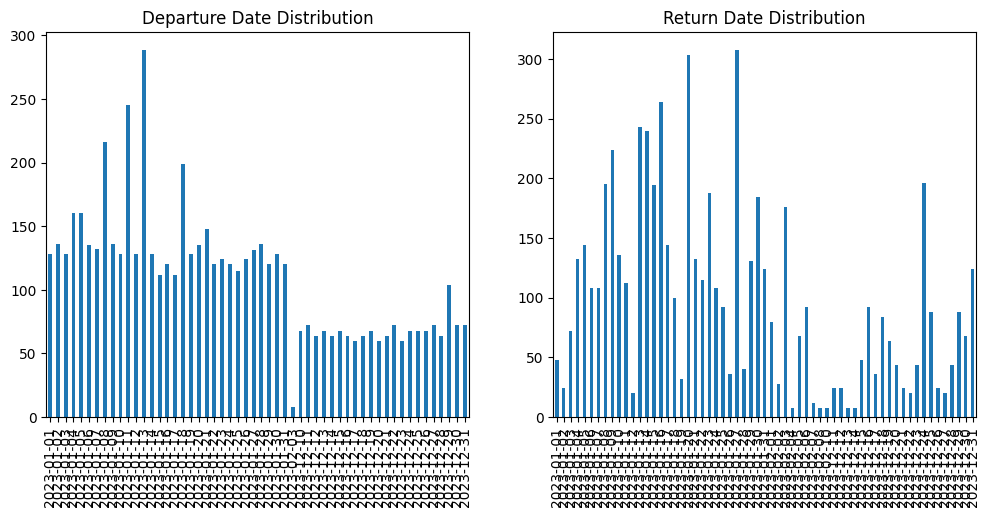

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
df['date_from'].dt.date.value_counts().sort_index().plot(kind='bar', ax=axes[0], title='Departure Date Distribution')
df['date_to'].dt.date.value_counts().sort_index().plot(kind='bar', ax=axes[1], title='Return Date Distribution')
plt.show()

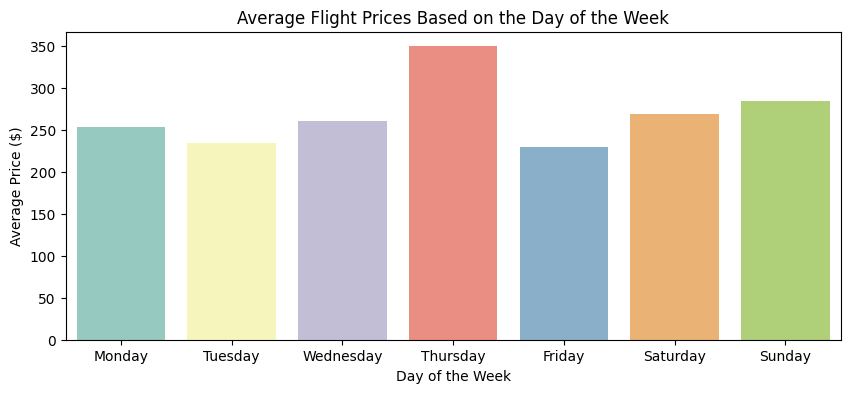

In [ ]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 4))
sns.barplot(x='departure_day', y='price', data=df, ci=None, palette='Set3', order=order)

plt.xlabel('Day of the Week')
plt.ylabel('Average Price ($)')
plt.title('Average Flight Prices Based on the Day of the Week')

plt.show()

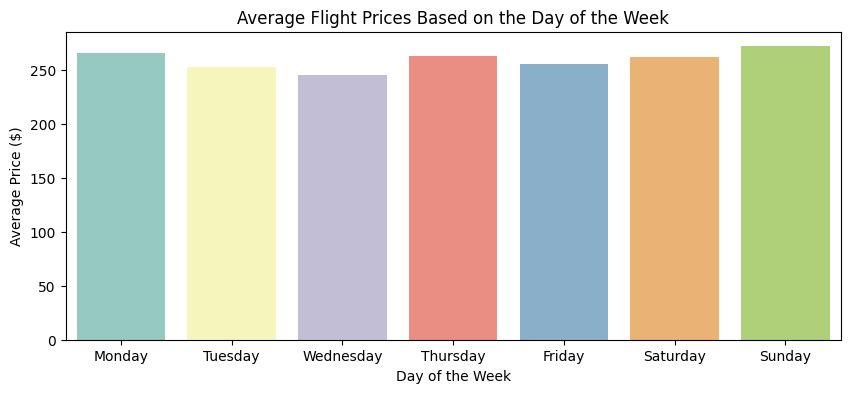

In [ ]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 4))
sns.barplot(x='arrival_day', y='price', data=df, ci=None, palette='Set3', order=order)

plt.xlabel('Day of the Week')
plt.ylabel('Average Price ($)')
plt.title('Average Flight Prices Based on the Day of the Week')

plt.show()

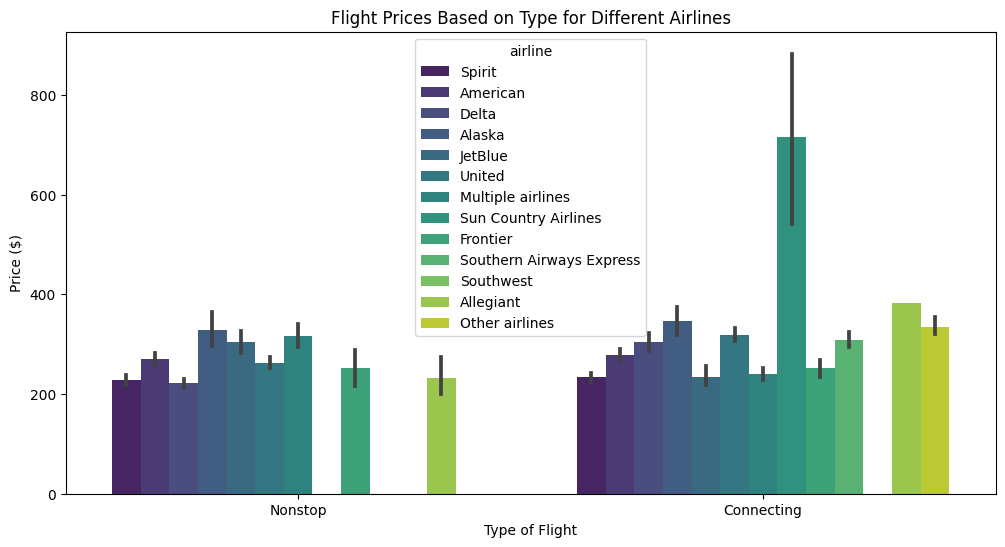

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='price', hue='airline', data=df, palette='viridis')

plt.xlabel('Type of Flight')
plt.ylabel('Price ($)')
plt.title('Flight Prices Based on Type for Different Airlines')

plt.show()

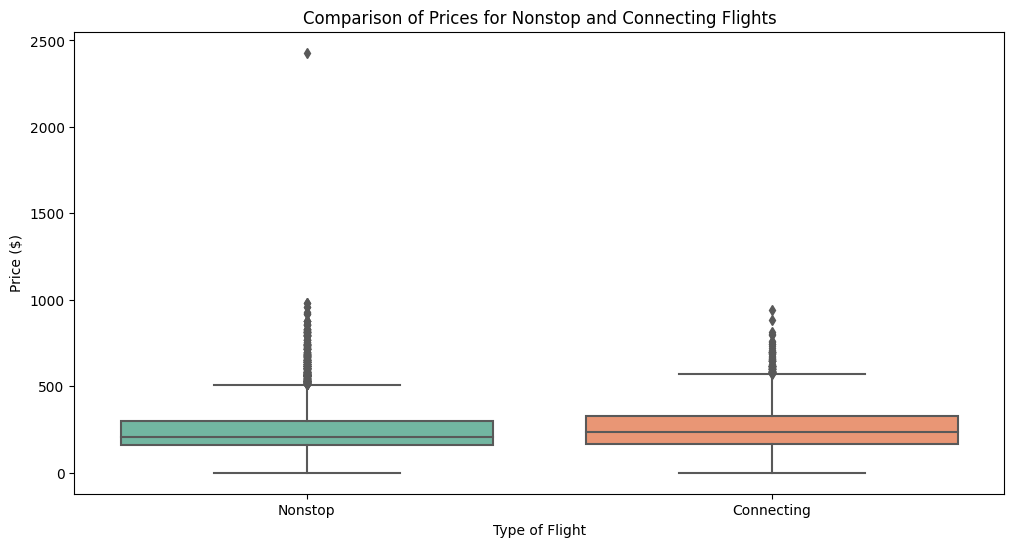

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='price', data=df, palette='Set2')

plt.xlabel('Type of Flight')
plt.ylabel('Price ($)')
plt.title('Comparison of Prices for Nonstop and Connecting Flights')

plt.show()

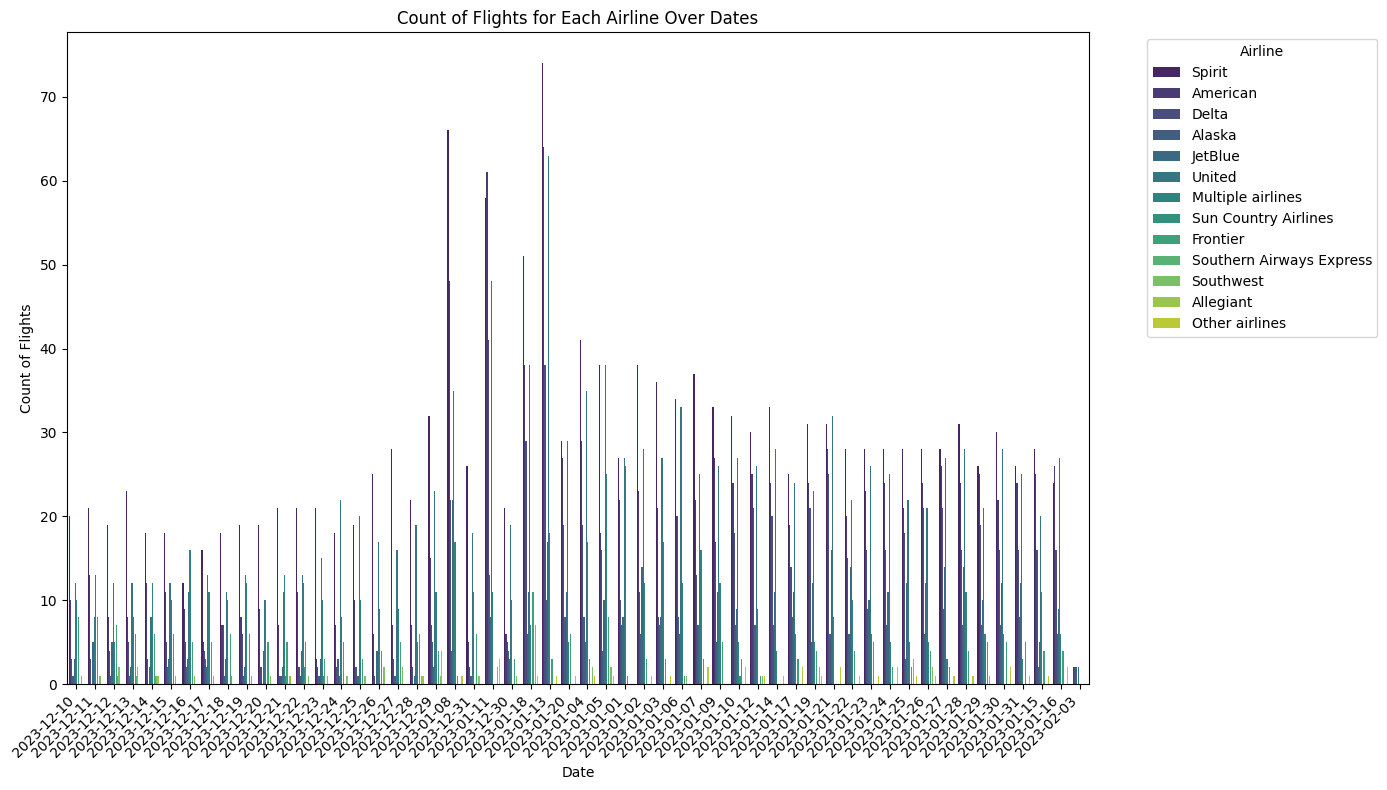

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='date_from_date', hue='airline', data=df, palette='viridis')

plt.xlabel('Date')
plt.ylabel('Count of Flights')
plt.title('Count of Flights for Each Airline Over Dates')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

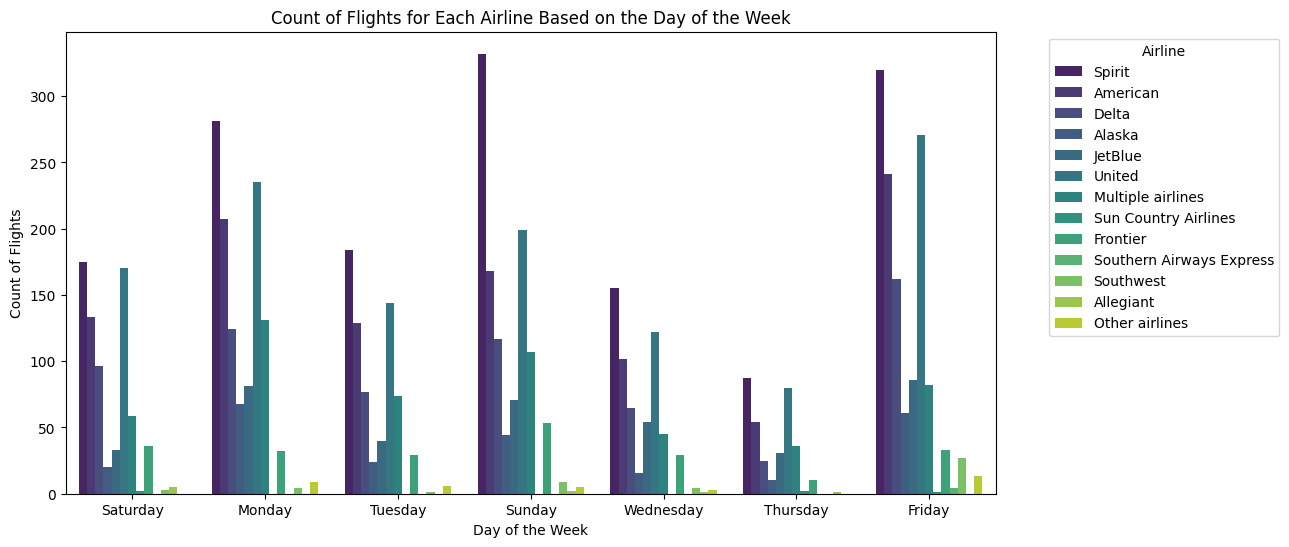

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='departure_day', hue='airline', data=df, palette='viridis')

plt.xlabel('Day of the Week')
plt.ylabel('Count of Flights')
plt.title('Count of Flights for Each Airline Based on the Day of the Week')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

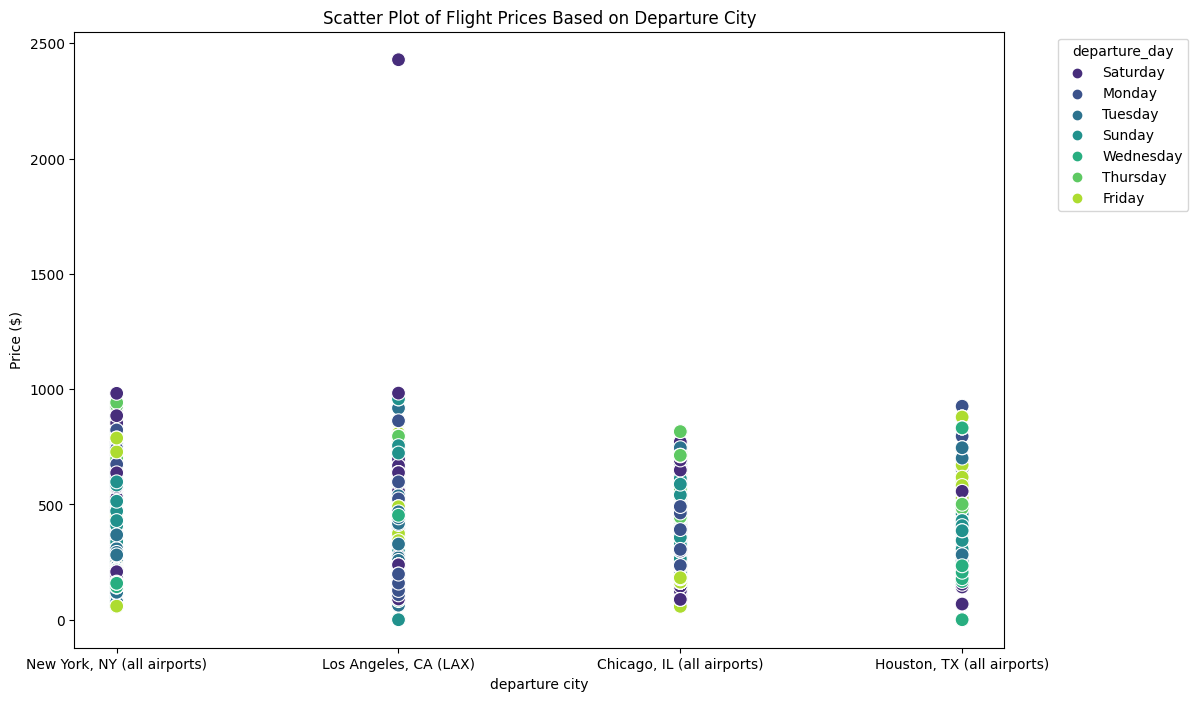

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='from', y='price', hue= 'departure_day', data=df, palette='viridis', s=100)

plt.xlabel('departure city')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Flight Prices Based on Departure City')
plt.legend(title='departure_day', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

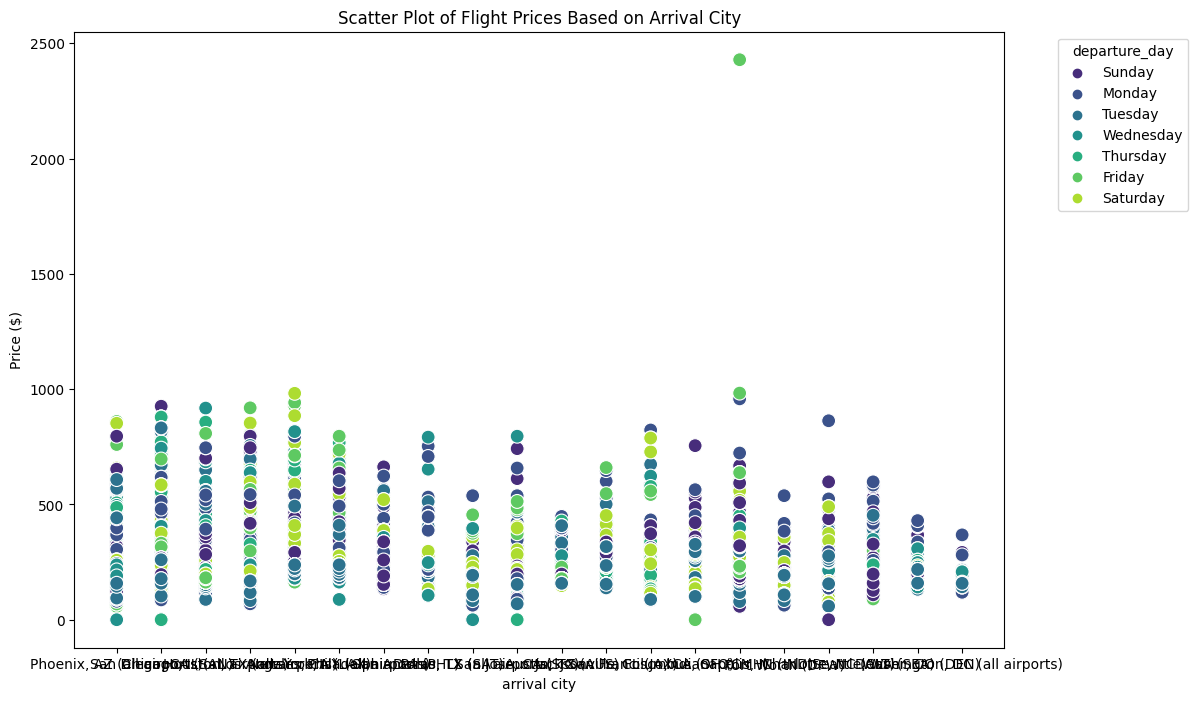

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='to', y='price', hue= 'arrival_day', data=df, palette='viridis', s=100)

plt.xlabel('arrival city')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Flight Prices Based on Arrival City')
plt.legend(title='departure_day', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()